In [23]:
import pandas as pd, sklearn, matplotlib.pyplot as plt, seaborn as sns, numpy as np
from sklearn.metrics.pairwise import cosine_similarity

In [60]:
df_lung_gene = pd.read_csv("LUNG_Gene_Expression.txt", sep="\t")
df_lung_methy = pd.read_csv("LUNG_Methy_Expression.txt", sep="\t")
df_lung_mirna = pd.read_csv("LUNG_Mirna_Expression.txt", sep="\t")


In [61]:
matrix_lung_gene=df_lung_gene.corr(method='spearman')
matrix_lung_methy=df_lung_methy.corr(method='spearman')
matrix_lung_mirna=df_lung_mirna.corr(method='spearman')

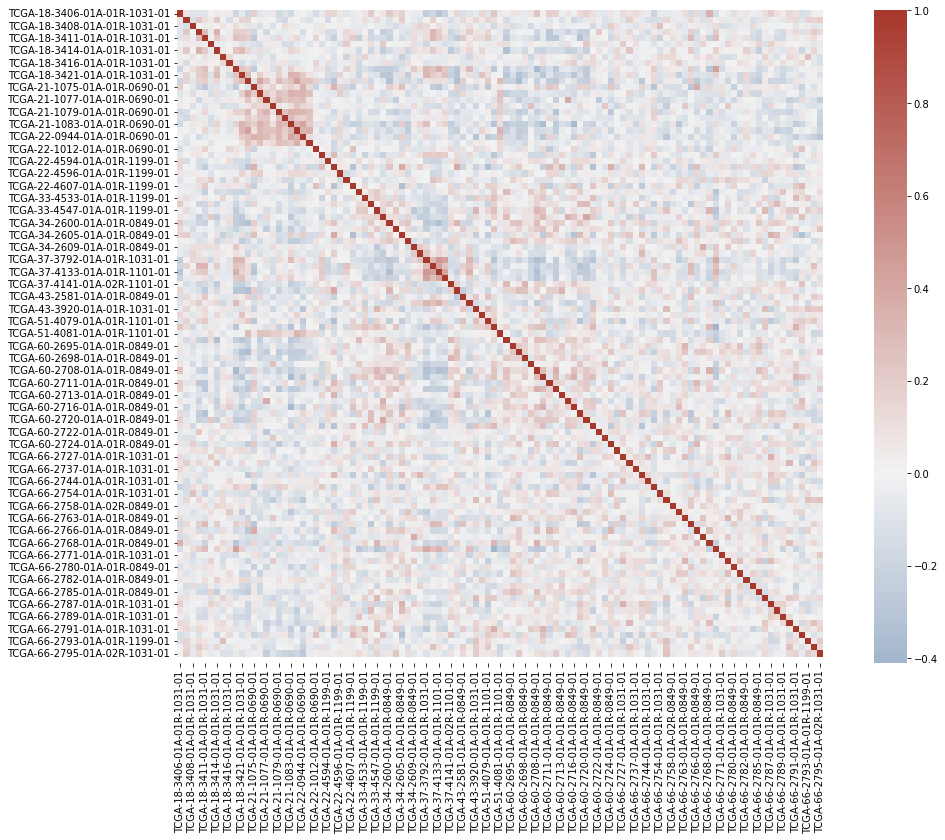

In [62]:
#LUNG_GENE
plt.figure(figsize=(16,12))

# Create a custom diverging palette
cmap = sns.diverging_palette(250, 15, s=75, l=40,
                             n=9, center="light", as_cmap=True)

_ = sns.heatmap(matrix_lung_gene, center=0,
                fmt='.2f', square=True, cmap=cmap)

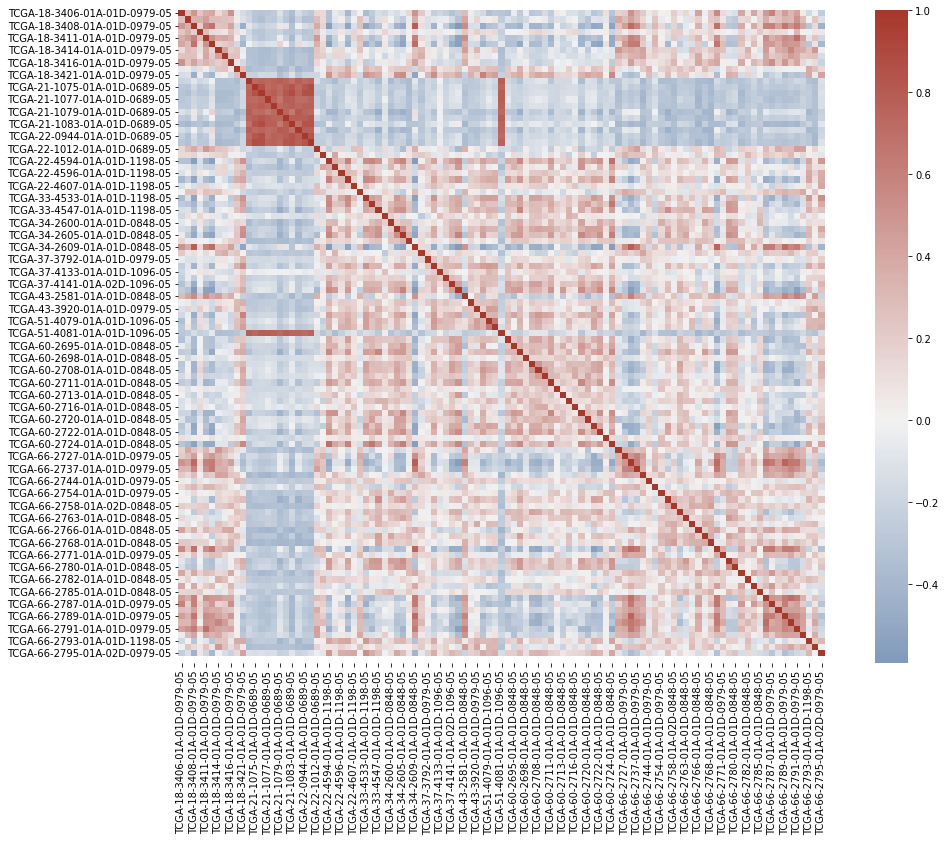

In [42]:
#LUNG_METHY
plt.figure(figsize=(16,12))

# Create a custom diverging palette
cmap = sns.diverging_palette(250, 15, s=75, l=40,
                             n=9, center="light", as_cmap=True)

_ = sns.heatmap(matrix_lung_methy, center=0,
                fmt='.2f', square=True, cmap=cmap)

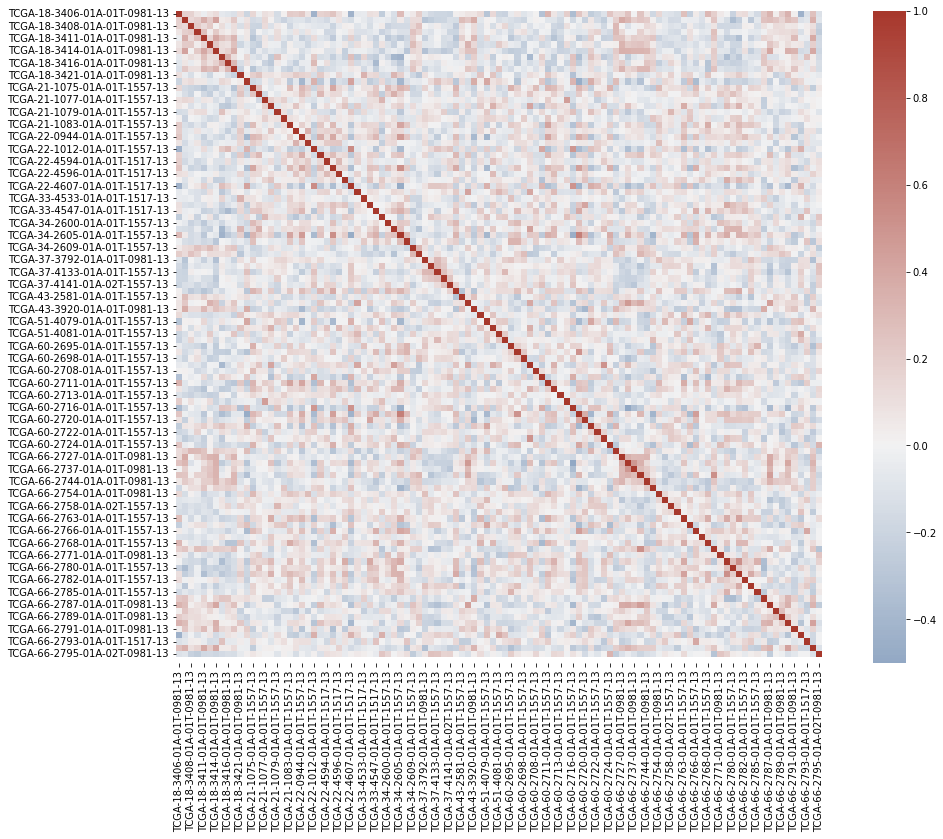

In [43]:
#LUNG_MIRNA
plt.figure(figsize=(16,12))

# Create a custom diverging palette
cmap = sns.diverging_palette(250, 15, s=75, l=40,
                             n=9, center="light", as_cmap=True)

_ = sns.heatmap(matrix_lung_mirna, center=0,
                fmt='.2f', square=True, cmap=cmap)

###Build the Patient similarity networks for each datatype. Use a weighted network where each edge is weighted by the correlation between its two nodes. In the correlation matrix, we compute all pairs of patients. We can define a threshold for which a connection can be considered. Two patients (i,j) are connected in the graph: if |corr(i,j)| >= X. Thus, in the graph only edges corresponding to a correlation greater than X are considered.

Hint: use the NetworkX package.



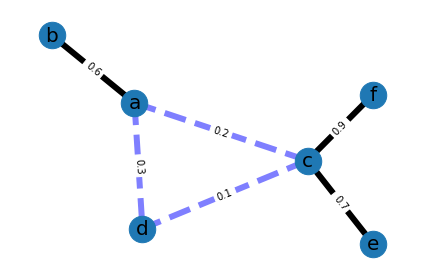

In [45]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.Graph()

G.add_edge("a", "b", weight=0.6)
G.add_edge("a", "c", weight=0.2)
G.add_edge("c", "d", weight=0.1)
G.add_edge("c", "e", weight=0.7)
G.add_edge("c", "f", weight=0.9)
G.add_edge("a", "d", weight=0.3)

elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 0.5]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 0.5]

pos = nx.spring_layout(G, seed=7)  # positions for all nodes - seed for reproducibility

# nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge, width=6)
nx.draw_networkx_edges(
    G, pos, edgelist=esmall, width=6, alpha=0.5, edge_color="b", style="dashed"
)

# node labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
# edge weight labels
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()

In [99]:
print(matrix_lung_gene.rows.values)

AttributeError: 'DataFrame' object has no attribute 'rows'

In [72]:
G = nx.from_pandas_adjacency(matrix_lung_gene)


Graph with 106 nodes and 5225 edges


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

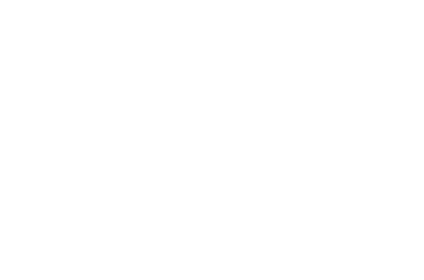

In [80]:
elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 0.5]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 0.5]

pos = nx.spring_layout(G, seed=7)  # positions for all nodes - seed for reproducibility

# nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge, width=6)
nx.draw_networkx_edges(
    G, pos, edgelist=esmall, width=6, alpha=0.5, edge_color="b", style="dashed"
)

# node labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
# edge weight labels
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()

In [76]:
threshold = 0.2

# filter out all edges above threshold and grab id's
long_edges = list(filter(lambda e: e[2] > threshold, (e for e in G.edges.data('weight'))))
le_ids = list(e[:2] for e in long_edges)

# remove filtered edges from graph G
G.remove_edges_from(le_ids)

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
from networkx import Graph


class PrintGraph(Graph):
    """
    Example subclass of the Graph class.

    Prints activity log to file or standard output.
    """

    def __init__(self, data=None, name="", file=None, **attr):
        super().__init__(data=data, name=name, **attr)
        if file is None:
            import sys

            self.fh = sys.stdout
        else:
            self.fh = open(file, "w")

    def add_node(self, n, attr_dict=None, **attr):
        super().add_node(n, attr_dict=attr_dict, **attr)
        self.fh.write(f"Add node: {n}\n")

    def add_nodes_from(self, nodes, **attr):
        for n in nodes:
            self.add_node(n, **attr)

    def remove_node(self, n):
        super().remove_node(n)
        self.fh.write(f"Remove node: {n}\n")

    def remove_nodes_from(self, nodes):
        for n in nodes:
            self.remove_node(n)

    def add_edge(self, u, v, attr_dict=None, **attr):
        super().add_edge(u, v, attr_dict=attr_dict, **attr)
        self.fh.write(f"Add edge: {u}-{v}\n")

    def add_edges_from(self, ebunch, attr_dict=None, **attr):
        for e in ebunch:
            u, v = e[0:2]
            self.add_edge(u, v, attr_dict=attr_dict, **attr)

    def remove_edge(self, u, v):
        super().remove_edge(u, v)
        self.fh.write(f"Remove edge: {u}-{v}\n")

    def remove_edges_from(self, ebunch):
        for e in ebunch:
            u, v = e[0:2]
            self.remove_edge(u, v)

    def clear(self):
        super().clear()
        self.fh.write("Clear graph\n")


G = PrintGraph()
G.add_node("foo")
G.add_nodes_from("bar", weight=8)
G.remove_node("b")
G.remove_nodes_from("ar")
print("Nodes in G: ", G.nodes(data=True))
G.add_edge(0, 1, weight=10)
print("Edges in G: ", G.edges(data=True))
G.remove_edge(0, 1)
G.add_edges_from(zip(range(0, 3), range(1, 4)), weight=10)
print("Edges in G: ", G.edges(data=True))
G.remove_edges_from(zip(range(0, 3), range(1, 4)))
print("Edges in G: ", G.edges(data=True))

G = PrintGraph()
nx.add_path(G, range(10))
nx.add_star(G, range(9, 13))
pos = nx.spring_layout(G, seed=225)  # Seed for reproducible layout
nx.draw(G, pos)
plt.show()

In [77]:
print(nx.info(G))

Graph with 106 nodes and 5225 edges


C:\Users\lmtrinta\AppData\Local\Temp\ipykernel_7372\2606185536.py:1: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(G))
